# Lab 1 Analysis Example using Thicket

In [1]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

What are the files we are analyzing?

In [2]:
all_files = glob("*.cali")
print(all_files)

['s0-p32-a262144.cali', 's0-p2-a262144.cali', 's0-p128-a65536.cali', 's0-p16-a65536.cali', 's0-p16-a262144.cali', 's0-p64-a65536.cali', 's0-p8-a262144.cali', 's0-p64-a262144.cali', 's0-p2-a65536.cali', 's0-p4-a65536.cali', 's0-p4-a262144.cali', 's0-p8-a65536.cali', 's0-p32-a65536.cali', 's0-p128-a262144.cali']


# Read n files (n = 33)

In [3]:
tk = th.Thicket.from_caliperreader(all_files)

What files?

In [4]:
tk.profile_mapping

OrderedDict([(320811180, 's0-p128-a65536.cali'),
             (408606444, 's0-p32-a65536.cali'),
             (835043985, 's0-p64-a262144.cali'),
             (1024215611, 's0-p64-a65536.cali'),
             (1111841103, 's0-p8-a262144.cali'),
             (1419116107, 's0-p128-a262144.cali'),
             (1529445491, 's0-p4-a65536.cali'),
             (2639578040, 's0-p8-a65536.cali'),
             (2978934560, 's0-p4-a262144.cali'),
             (3213246868, 's0-p16-a262144.cali'),
             (3302984143, 's0-p2-a65536.cali'),
             (3736196693, 's0-p32-a262144.cali'),
             (4002320293, 's0-p2-a262144.cali'),
             (4015451071, 's0-p16-a65536.cali')])

Call tree

In [5]:
tk.statsframe.dataframe["test"] = -1
print(tk.tree(metric_column="test"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

-1.000 main
├─ -1.000 comm
│  └─ -1.000 comm_large
│     ├─ -1.000 MPI_Bcast
│     └─ -1.000 MPI_Gather
├─ -1.000 comp
│  └─ -1.000 comp_large
├─ -1.000 correctness_check
└─ -1.000 data_init

Legend (Metric: test Min: -1.00 Max: -1.00)
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00
█ -1.00 - -1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



Performance data

In [6]:
tk.dataframe

nid  \
node                                              profile           
{'name': 'main', 'type': 'function'}              320811180     1   
                                                  408606444     1   
                                                  835043985     1   
                                                  1024215611    1   
                                                  1111841103    1   
                                                  1419116107    1   
                                                  1529445491    1   
                                                  2639578040    1   
                                                  2978934560    1   
                                                  3213246868    1   
                                                  3302984143    1   
                                                  3736196693    1   
                                                  4002320293    1   
                                                  4015451071    1   
{'name': 'comm', 'type': 'function'}              320811180     3   
                                                  408606444     3   
                                                  835043985     3   
                                                  1024215611    3   
                                                  1111841103    3   
                                                  1419116107    3   
                                                  1529445491    3   
                                                  2639578040    3   
                                                  2978934560    3   
                                                  3213246868    3   
                                                  3302984143    3   
                                                  3736196693    3   
                                                  4002320293    3   
                                                  4015451071    3   
{'name': 'comm_large', 'type': 'function'}        320811180     4   
                                                  408606444     4   
                                                  835043985     4   
                                                  1024215611    4   
                                                  1111841103    4   
                                                  1419116107    4   
                                                  1529445491    4   
                                                  2639578040    4   
                                                  2978934560    4   
                                                  3213246868    4   
                                                  3302984143    4   
                                                  3736196693    4   
                                                  4002320293    4   
                                                  4015451071    4   
{'name': 'MPI_Bcast', 'type': 'function'}         320811180     5   
                                                  408606444     5   
                                                  835043985     5   
                                                  1024215611    5   
                                                  1111841103    5   
                                                  1419116107    5   
                                                  1529445491    5   
                                                  2639578040    5   
                                                  2978934560    5   
                                                  3213246868    5   
                                                  3302984143    5   
                                                  3736196693    5   
                                                  4002320293    5   
                                                  4015451071    5   
{'name': 'MPI_Gather', 'type': 'function'}        320811180 

Metadata

In [7]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
320811180,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p128-a65536.cali,true,1700000369,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,128,0,0,20,Online
408606444,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p32-a65536.cali,true,1699998639,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,32,0,0,20,Online
835043985,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p64-a262144.cali,true,1699998768,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,64,0,0,20,Online
1024215611,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p64-a65536.cali,true,1699998741,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,64,0,0,20,Online
1111841103,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p8-a262144.cali,true,1699998451,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,8,0,0,20,Online
1419116107,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p128-a262144.cali,true,1700000369,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,128,0,0,20,Online
1529445491,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p4-a65536.cali,true,1699998390,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,4,0,0,20,Online
2639578040,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p8-a65536.cali,true,1699998440,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,8,0,0,20,Online
2978934560,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p4-a262144.cali,true,1699998392,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,4,0,0,20,Online


# Goal

programmatically analyze the data by graphing it

Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [8]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,num_threads,num_blocks,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,
320811180,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p128-a65536.cali,true,1700000369,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,128,0,0,20,Online
408606444,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p32-a65536.cali,true,1699998639,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,32,0,0,20,Online
835043985,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p64-a262144.cali,true,1699998768,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,64,0,0,20,Online
1024215611,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p64-a65536.cali,true,1699998741,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,64,0,0,20,Online
1111841103,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p8-a262144.cali,true,1699998451,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,8,0,0,20,Online
1419116107,2.11.0-dev,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p128-a262144.cali,true,1700000369,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,128,0,0,20,Online
1529445491,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p4-a65536.cali,true,1699998390,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,4,0,0,20,Online
2639578040,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p8-a65536.cali,true,1699998440,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 65536, 0]",c,EnumerationSort,MPI,float,4,65536,Random,8,0,0,20,Online
2978934560,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,s0-p4-a262144.cali,true,1699998392,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./enumeration_sort, 262144, 0]",c,EnumerationSort,MPI,float,4,262144,Random,4,0,0,20,Online


In [9]:
gb = tk.groupby("InputSize")

2  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2b4a43a47c10>, 262144: <thicket.thicket.Thicket object at 0x2b4a43b02d60>}


Compose these 3 groups column-wise to get a holistic view of the data

In [11]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [12]:
ctk.dataframe

65536  \
                                                              nid   
node                                              num_procs         
{'name': 'main', 'type': 'function'}              2             1   
                                                  4             1   
                                                  8             1   
                                                  16            1   
                                                  32            1   
                                                  64            1   
                                                  128           1   
{'name': 'comm', 'type': 'function'}              2             3   
                                                  4             3   
                                                  8             3   
                                                  16            3   
                                                  32            3   
                                                  64            3   
                                                  128           3   
{'name': 'comm_large', 'type': 'function'}        2             4   
                                                  4             4   
                                                  8             4   
                                                  16            4   
                                                  32            4   
                                                  64            4   
                                                  128           4   
{'name': 'MPI_Bcast', 'type': 'function'}         2             5   
                                                  4             5   
                                                  8             5   
                                                  16            5   
                                                  32            5   
                                                  64            5   
                                                  128           5   
{'name': 'MPI_Gather', 'type': 'function'}        2             8   
                                                  4             8   
                                                  8             8   
                                                  16            8   
                                                  32            8   
                                                  64            8   
                                                  128           8   
{'name': 'comp', 'type': 'function'}              2             6   
                                                  4             6   
                                                  8             6   
                                                  16            6   
                                                  32            6   
                                                  64            6   
                                                  128           6   
{'name': 'comp_large', 'type': 'function'}        2             7   
                                                  4             7   
                                                  8             7   
                                                  16            7   
                                                  32            7   
                                                  64            7   
                                                  128           7   
{'name': 'correctness_check', 'type': 'function'} 2             9   
                                                  4             9   
                                                  8             9   
                                                  16            9   
                                                  32            9   
                                                  64            9   
                                                  128     

In [13]:
ctk.metadata

65536                  \
          cali.caliper.version mpi.world.size   
num_procs                                       
2                   2.11.0-dev              2   
4                   2.11.0-dev              4   
8                   2.11.0-dev              8   
16                  2.11.0-dev             16   
32                  2.11.0-dev             32   
64                  2.11.0-dev             64   
128                 2.11.0-dev            128   

                                                              \
                                                spot.metrics   
num_procs                                                      
2          min#inclusive#sum#time.duration,max#inclusive#...   
4          min#inclusive#sum#time.duration,max#inclusive#...   
8          min#inclusive#sum#time.duration,max#inclusive#...   
16         min#inclusive#sum#time.duration,max#inclusive#...   
32         min#inclusive#sum#time.duration,max#inclusive#...   
64         min#inclusive#sum#time.duration,max#inclusive#...   
128        min#inclusive#sum#time.duration,max#inclusive#...   

                                                       \
          spot.timeseries.metrics spot.format.version   
num_procs                                               
2                                                   2   
4                                                   2   
8                                                   2   
16                                                  2   
32                                                  2   
64                                                  2   
128                                                 2   

                                                                 \
                       spot.options  spot.channels cali.channel   
num_procs                                                         
2          time.variance,node.order  regionprofile         spot   
4          time.variance,node.order  regionprofile         spot   
8          time.variance,node.order  regionprofile         spot   
16         time.variance,node.order  regionprofile         spot   
32         time.variance,node.order  regionprofile         spot   
64         time.variance,node.order  regionprofile         spot   
128        time.variance,node.order  regionprofile         spot   

                                                                               \
          spot:node.order          spot:output spot:time.variance  launchdate   
num_procs                                                                       
2                    true    s0-p2-a65536.cali               true  1699998343   
4                    true    s0-p4-a65536.cali               true  1699998390   
8                    true    s0-p8-a65536.cali               true  1699998440   
16                   true   s0-p16-a65536.cali               true  1699998522   
32                   true   s0-p32-a65536.cali               true  1699998639   
64                   true   s0-p64-a65536.cali               true  1699998741   
128                  true  s0-p128-a65536.cali               true  1700000369   

                                                              \
                                                   libraries   
num_procs                                                      
2          [/scratch/group/csce435-f23/Caliper/caliper/li...   
4          [/scratch/group/csce435-f23/Caliper/caliper/li...   
8          [/scratch/group/csce435-f23/Caliper/caliper/li...   
16         [/scratch/group/csce435-f23/Caliper/caliper/li...   
32         [/scratch/group/csce435-f23/Caliper/caliper/li...   
64         [/scratch/group/csce435-f23/Caliper/caliper/li...   
128        [/scratch/group/csce435-f23/Caliper/caliper/li...   

                                                                    \
                                  cmdline cluster        Algorithm   
num_procs                                                 

Perform pandas operations to get the table in a desirable format for plotting

In [14]:
# Drop unwanted columns
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), \
                                                  (65536, "nid"), (65536, "spot.channel"), (65536, "Min time/rank"),(65536, "Max time/rank"),(65536, "Total time"),(65536,"Variance time/rank"),\
                                                  (262144, "nid"), (262144, "spot.channel"), (262144, "Min time/rank"),(262144, "Max time/rank"),(262144, "Total time"),(262144,"Variance time/rank"),\
                                                  #(1048576, "nid"), (1048576, "spot.channel"), (1048576, "Min time/rank"), (1048576, "Max time/rank"), (1048576, "Avg time/rank"), (1048576, "Avg GPU time/rank"), (1048576, "Min GPU time/rank"), (1048576, "Max GPU time/rank"), (1048576, "Total GPU time"),\
                                                  #(4194304, "nid"), (4194304, "spot.channel"), (4194304, "Min time/rank"), (4194304, "Max time/rank"), (4194304, "Avg time/rank"), (4194304, "Avg GPU time/rank"), (4194304, "Min GPU time/rank"), (4194304, "Max GPU time/rank"), (4194304, "Total GPU time"),\
                                                  #(16777216, "nid"), (16777216, "spot.channel"), (16777216, "Min time/rank"), (16777216, "Max time/rank"), (16777216, "Avg time/rank"), (16777216, "Avg GPU time/rank"), (16777216, "Min GPU time/rank"), (16777216, "Max GPU time/rank"), (16777216, "Total GPU time"),\
                                                  #(67108864, "nid"), (67108864, "spot.channel"), (67108864, "Min time/rank"), (67108864, "Max time/rank"), (67108864, "Avg time/rank"), (67108864, "Avg GPU time/rank"), (67108864, "Min GPU time/rank"), (67108864, "Max GPU time/rank"), (67108864, "Total GPU time")
                                                 ], axis=1)



In [17]:
# Rename index to remove tuple
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [18]:
# Drop "time" label as it is redundant
ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [20]:
ctk.dataframe

65536      262144
name              num_procs                       
main              2          44.180628  507.902295
                  4          32.560101  508.472802
                  8          33.277648  511.148945
                  16         34.778658  512.782398
                  32         39.024312  522.908713
                  64         41.252448  519.520369
                  128        35.688907  267.900309
comm              2           0.039096    0.014126
                  4           0.046696    0.067039
                  8           0.114296    0.288962
                  16          0.088168    0.354077
                  32          0.216990    0.440884
                  64          0.386022    0.733339
                  128         1.165561    1.351733
comm_large        2           0.039067    0.014093
                  4           0.046659    0.067004
                  8           0.114260    0.288924
                  16          0.088132    0.350034
                  32          0.213390    0.440846
                  64          0.385987    0.733302
                  128         1.164386    1.351597
MPI_Bcast         2           0.032248    0.013108
                  4           0.018349    0.058431
                  8           0.080623    0.089300
                  16          0.068623    0.192582
                  32          0.185602    0.356468
                  64          0.238454    0.670263
                  128         1.058543    1.209669
MPI_Gather        2           0.006784    0.000943
                  4           0.028273    0.008532
                  8           0.033599    0.199587
                  16          0.019478    0.157413
                  32          0.027751    0.084341
                  64          0.147492    0.060454
                  128         0.105800    0.140296
comp              2          31.636505  507.444338
                  4          31.747484  507.183442
                  8          31.630729  509.479155
                  16         32.065463  509.749397
                  32         32.796162  516.958540
                  64         31.582881  509.651135
                  128        15.712877  254.762162
comp_large        2          31.636463  507.444286
                  4          31.747440  507.183397
                  8          31.630687  509.479101
                  16         32.065425  509.749335
                  32         32.796109  516.958493
                  64         31.582848  509.647335
                  128        15.708187  254.753714
correctness_check 2           0.000178    0.000684
                  4           0.000182    0.000688
                  8           0.000180    0.000690
                  16          0.000180    0.000723
                  32          0.000187    0.000688
                  64          0.000181    0.000692
                  128         0.000182    0.144533
data_init         2           0.001544    0.006617
                  4           0.001541    0.044237
                  8           0.005017    0.038146
                  16          0.099192    0.151406
                  32          0.001529    0.412192
                  64          0.001537    0.214297
                  128         0.001543    0.179112

In [26]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [27]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [23]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [22]:
ctk.dataframe.loc["main"]

,65536,262144
num_procs,,
2,44.180628,507.902295
4,32.560101,508.472802
8,33.277648,511.148945
16,34.778658,512.782398
32,39.024312,522.908713
64,41.252448,519.520369
128,35.688907,267.900309


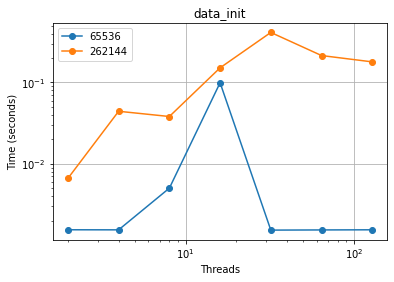

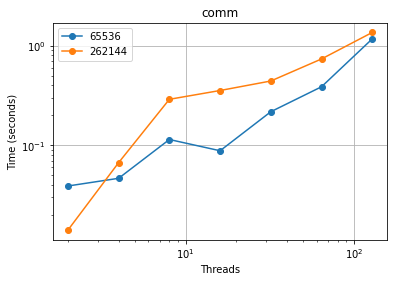

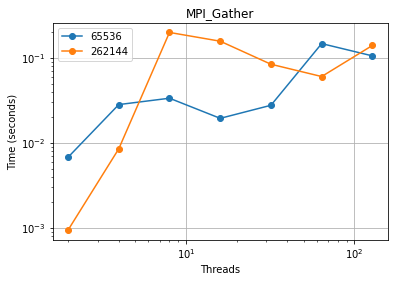

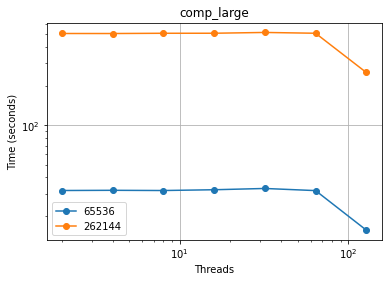

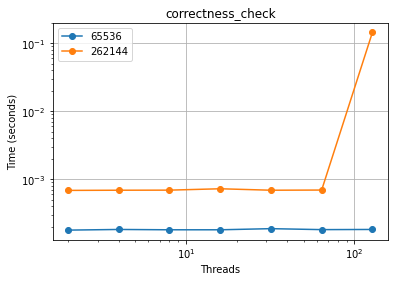

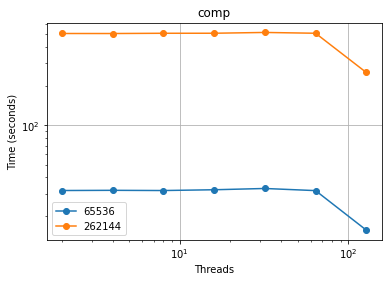

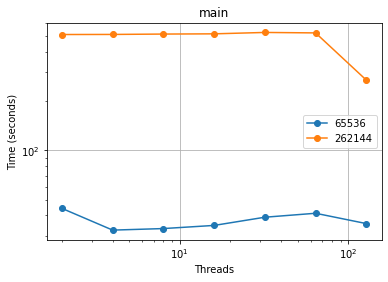

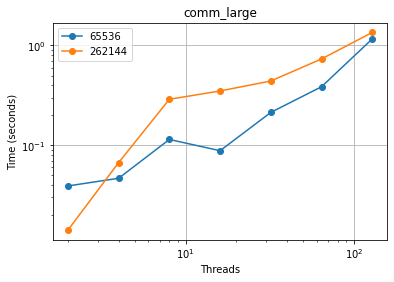

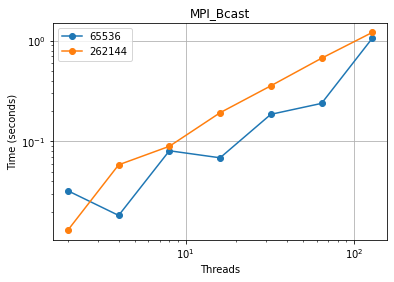

In [28]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

In [24]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
    )

NameError: name 'function_names' is not defined

## Speedup

In [26]:
ctk.dataframe

65536    262144   1048576    4194304  \
name              num_threads                                            
main              64           0.642092  0.712372  1.457336  12.077580   
                  128          0.610994  0.446238  1.190037  11.810903   
                  256          0.328821  0.709014  1.192982  12.101881   
                  512          0.338536  0.408878  1.109473  11.917889   
                  1024         0.332051  0.428586  1.415353  11.998971   
comm              64           0.005123  0.086054  0.840317  11.434738   
                  128          0.006536  0.047666  0.833091  11.396879   
                  256          0.006355  0.090427  0.834413  11.465029   
                  512          0.007210  0.077244  0.757204  11.481844   
                  1024         0.007678  0.094359  0.810835  11.339621   
comm_large        64           0.005046  0.086005  0.840266  11.434679   
                  128          0.006483  0.047610  0.833035  11.396828   
                  256          0.006301  0.090363  0.834356  11.464963   
                  512          0.007150  0.077186  0.757144  11.481782   
                  1024         0.007623  0.094303  0.810780  11.339571   
cudaMemcpy        64           0.004989  0.085965  0.840211  11.434611   
                  128          0.006451  0.047568  0.832987  11.396769   
                  256          0.006268  0.090317  0.834307  11.464908   
                  512          0.007115  0.077140  0.757094  11.481722   
                  1024         0.007592  0.094256  0.810719  11.339506   
comp              64           0.000240  0.000082  0.000085   0.000090   
                  128          0.000085  0.000090  0.000091   0.000086   
                  256          0.000092  0.000092  0.000093   0.000085   
                  512          0.000091  0.000100  0.000098   0.000099   
                  1024         0.000085  0.000091  0.000098   0.000084   
comp_large        64           0.000207  0.000068  0.000070   0.000073   
                  128          0.000071  0.000076  0.000077   0.000070   
                  256          0.000079  0.000076  0.000078   0.000070   
                  512          0.000077  0.000084  0.000081   0.000081   
                  1024         0.000072  0.000077  0.000080   0.000069   
correctness_check 64           0.000399  0.000701  0.002768   0.011002   
                  128          0.000181  0.000702  0.002768   0.011022   
                  256          0.000180  0.000701  0.002770   0.010953   
                  512          0.000179  0.000710  0.002736   0.010979   
                  1024         0.000179  0.000701  0.002762   0.011039   
data_init         64           0.001646  0.007009  0.024406   0.094006   
                  128          0.001505  0.006512  0.023380   0.097502   
                  256          0.001504  0.006797  0.023079   0.093628   
                  512          0.001496  0.005910  0.023202   0.093163   
                  1024         0.001493  0.005916  0.023420   0.093525   

                                 16777216     67108864  
name              num_threads                           
main              64           182.870666  2945.896275  
                  128          181.445471  2959.806924  
                  256          183.539106  2939.753842  
                  512          183.378530  2963.873032  
                  1024         182.136138  2915.969105  
comm              64           182.115315  2943.893475  
                  128          180.803069  2957.790251  
                  256          182.558967  2937.856818  
                  512          182.603219  2961.795000  
                  1024         181.387695  2913.976740  
comm_large        64           182.115258  2943.893416  
                  128          180.803013  2957.790192  
                  256          182.558912  2937.856757  
                  512          182.603159  2961.794925  
             

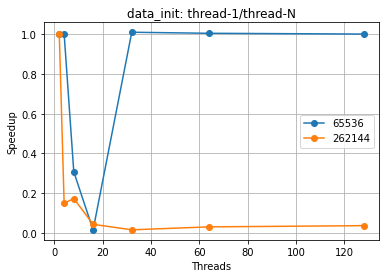

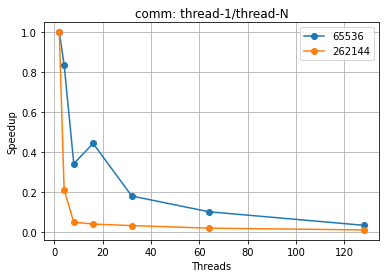

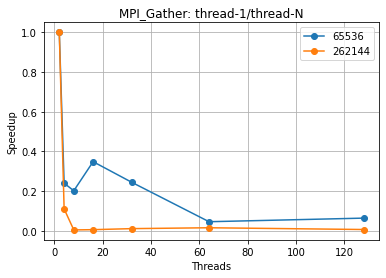

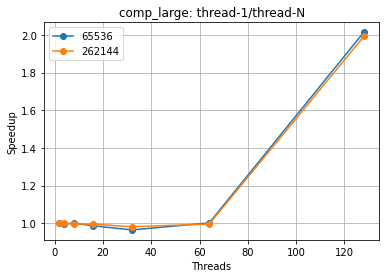

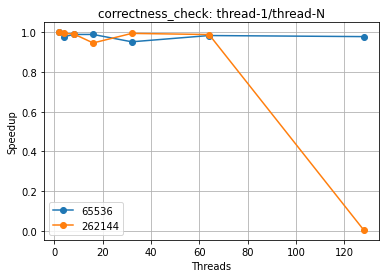

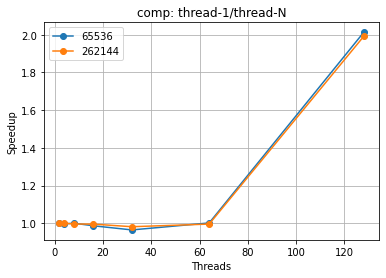

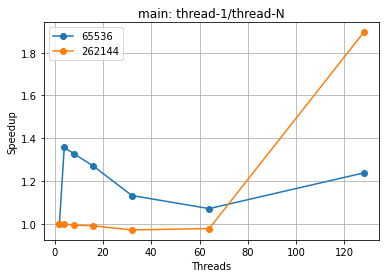

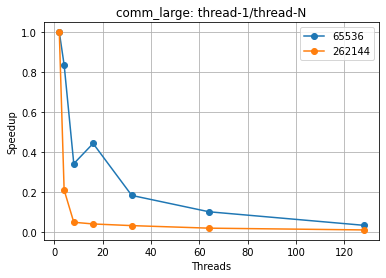

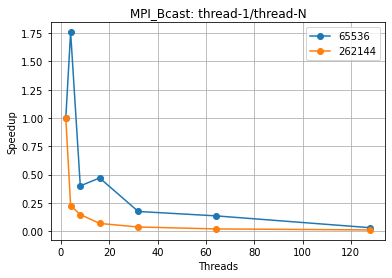

In [30]:
speedup_df = ctk.dataframe.loc[(slice(None),2), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )

In [27]:
ctk.dataframe.index

MultiIndex([(             'main',   64),
            (             'main',  128),
            (             'main',  256),
            (             'main',  512),
            (             'main', 1024),
            (             'comm',   64),
            (             'comm',  128),
            (             'comm',  256),
            (             'comm',  512),
            (             'comm', 1024),
            (       'comm_large',   64),
            (       'comm_large',  128),
            (       'comm_large',  256),
            (       'comm_large',  512),
            (       'comm_large', 1024),
            (       'cudaMemcpy',   64),
            (       'cudaMemcpy',  128),
            (       'cudaMemcpy',  256),
            (       'cudaMemcpy',  512),
            (       'cudaMemcpy', 1024),
            (             'comp',   64),
            (             'comp',  128),
            (             'comp',  256),
            (             'comp',  512),
            (   